JURNAL NO. 1

In [14]:
"""
Syntax dibawah merupakan syntax untuk mengimport/memanggil library library yang akan
digunakan untuk mengolah citra yang ada, library-library yang digunakan seperti metplotlib.pyplot
(plt), cv2 (cv) dan numpy (np)
"""
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

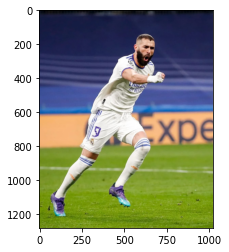

In [15]:
"""
SYntax dibawah merupakan insialisasi dari variabel image, yang mana merupakan
variabel yang digunakan untuk menyimpan citra yang akan diolah dengan menggunakan
method imread dari library matplotlib.pyplot (plt) yang dimana citranya diambil dari local komputer
dan menampilkannya dengan method imshow dari method yang sama
"""
image = plt.imread('./Jurnal.jpg')
plt.imshow(image)

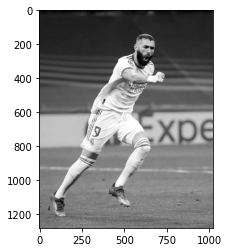

In [16]:
"""
Syntax dibawah merupakan inisialisasi variabel grayImage yang mana
variabel yang berisi citra yang ada namun diubah kedalam warna abu
menggunakan method cvtColor dari library cv2 lalu menampilkannya menggunakan
method imshow dari library matplotlib.pyplot (plt)
"""
grayImage = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
plt.imshow(grayImage, cmap='gray')

In [17]:
"""
Syntax dibawah merupakan inisialisasi dari variabel tinggi dan lebar, 
yang mana berisi nilai panjang dan lebar dari citra yang ada dengan menggunakan
method .shape dari python
"""
tinggi, lebar = grayImage.shape

"""
Syntax dibawah merupakan insialisasi sumGray yang mana berisi
array bernilai 0 sebanyak 256 array dengan tipe int
dan menampilkan nilai dari variabel tinggi dan lebar
"""
sumGray = np.zeros(256).astype(int)
print(tinggi, lebar)

1280 1023


In [18]:
"""
Syntax dibawah merupakan perulangan for yang digunakan untuk iterasi dari pixel 0,0
pada citra sampai index terakhir dari citra guna melakukan proses pengambilan nilai
tingkat keabuan dari setiap pixel
"""
for i in range (tinggi):
    for j in range (lebar):

        """
        Syntax dibawah merupakan inisialisasi dari variabel grayValue, yang mana
        berisi nilai tingkat keabuan dari setiap pixel, lalu disimpan datanya kedalam 
        variabel sumGray
        """
        grayValue = grayImage[i, j]
        sumGray[grayValue] += 1

In [19]:
"""
Syntax dibawah merupakan inisialisasi dari variabel grayIndex, yang mana
berisi array dari 0 sampai 255 guna untuk menampilkan data pada variabel
sumGray pada histogram
"""
grayIndex = [i for i in range(256)]

In [29]:
"""
Syntax dibawah merupakan syntax untuk menampilkan data hasil persebaran tingkat keabuan
dari citra yang ada dengan menggunakan method print dari python
"""
print(sumGray)

[   26    84   141   266   396   449   582   683   821   870   970  1205
  1224  1211  1153  1304  1270   993  1013  1065  1008  1065  1096  1138
  1174  1435  1505  1808  2719  7338 12044 18807 11796 12897 22227 17887
 23128 24412 15559 11839 12099  9558  8565 11258  5980  6991  7182  5186
  4958  5225  4508  4790  5014  4911  4627  4477  4225  4419  4580  3888
  3541  3764  3460  3540  3298  3022  3056  2901  3163  3362  3793  2852
  2645  2730  2254  2502  2495  2865  2965  3187  3253  3646  4102  4378
  5939  7651  6655  7721  9227  9961 11286 12148  8833  7192  6502  4645
  4297  3997  3677  3656  3649  3619  3853  4072  4416  4454  4701  4601
  4647  4651  4685  4540  4894  5013  5312  5648  5945  6572  6843  7682
  9226 10457 11051 12117 13273 14746 15886 18951 20202 19622 18762 18288
 21067 25187 20453 18959 17071 13144 12072 11972 11473 11896 11363 10251
  8779  7459  6191  4951  4303  3693  3278  2901  2630  2362  2178  2209
  2156  1964  2078  2123  2005  2009  2149  2060  2

Histogram Persebaran Tingkat Keabuan

<BarContainer object of 256 artists>

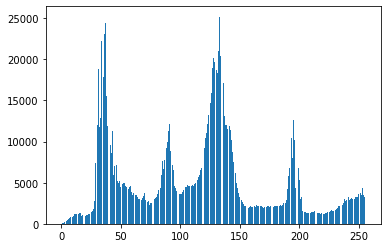

In [20]:
"""
Syntax dibawah merupakan syntax untuk menampilkan hasil data pada variabel
sumGray pada histogram, dengan menggunakan method bar dari library matplotlib.pyplot
(plt)
"""
plt.bar(grayIndex, sumGray)

Histogram Probabilitas Nilai Keabuan

<BarContainer object of 256 artists>

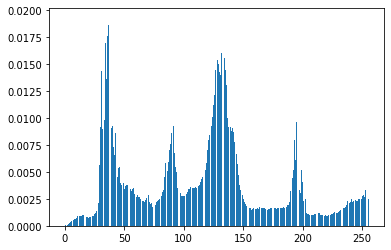

In [21]:
"""
Syntax dibawah merupakan syntax untuk menampilkan hasil data pada variabel
sumGray namun dibagi dengan ukuran citra guna mencari probabilitas tingkat 
keabuan dari setiap pixel pada histogram, dengan menggunakan method bar 
dari library matplotlib.pyplot (plt)
"""
plt.bar(grayIndex, sumGray/(tinggi*lebar))

JURNAL NO. 2

In [22]:
""" 
Syntax dibawah merupakan inisialisasi variabel kernel yang akan 
digunakan untuk melakukan proses konvolusi pada citra yang ada
"""
kernelMatrix = [[0, -1, 0],
                [-1, 5, -1],
                [0, -1, 0],
                [-1, 5, -1]]


"""
Syntax dibwah merupakan inisialisasi variabel konvResult, yang mana
merupakan variabel yang digunakan untuk menyimpan hasil konvolusi
dari citra yang diolah
"""
konvResult = np.zeros((tinggi, lebar))

"""
Syntx dibawah merupakan inisialisasi variabel imagePad, yang mana merupakan
variabel yang berisi nilai matriks dari citra yang diproses namun matriksnya
diberikan padding dengan menggunakan zero padding pada 2 baris setelah baris asli citra
dan 3 kolom setelah kolom asli citra
"""
imagePad = np.pad(grayImage, [(0, 3), (0, 2)])

Konvolusi Tanpa Clipping

In [23]:
"""
Syntax dibawah merupakan perulangan for yang digunakan untuk melakukan iterasi
dari 0 sampai ukuran panjang dan lebar dari citra guna melakukan perpindahan
proses perhitungan kernel sesuai teori dari konvolusi
"""
for i in range (tinggi):
    for j in range (lebar):
        
        
        """
        Syntax dibawah merupakan proses utama dari konvolusi pada citra yang ada,
        variabel konvResult digunakan untuk menyimpan data perhitungan konvolusi dari setiap
        perpindahan kernel pada matriks citra yang ada
        """
        konvResult[i][j] = imagePad[i][j]*kernelMatrix[0][0] + imagePad[i][j+1]*kernelMatrix[0][1] + imagePad[i][j+2]*kernelMatrix[0][2] + imagePad[i+1][j]*kernelMatrix[1][0] + imagePad[i+1][j+1]*kernelMatrix[1][1] + imagePad[i+1][j+2]*kernelMatrix[1][2] + imagePad[i+2][j]*kernelMatrix[2][0] + imagePad[i+2][j+1]*kernelMatrix[2][1] + imagePad[i+2][j+2]*kernelMatrix[2][2] + imagePad[i+3][j]*kernelMatrix[3][0] + imagePad[i+3][j+1]*kernelMatrix[3][1] + imagePad[i+3][j+2]*kernelMatrix[3][2]

In [24]:
"""
Syntax dibawah merupakan syntax untuk menampilkan hasil konvolusi tanpa clipping
dari citra yang ada dengan menggunakan method print dari python
"""
print(konvResult)

[[  77.   77.   77. ...   64.   96.  -32.]
 [  78.   78.   78. ...   64.   96.  -32.]
 [  75.   75.   75. ...   64.   96.  -32.]
 ...
 [ 106.  110.  109. ...  128.  245. -123.]
 [ 226.  231.  227. ...  256.  365. -123.]
 [-111. -113. -113. ... -127. -123.    0.]]


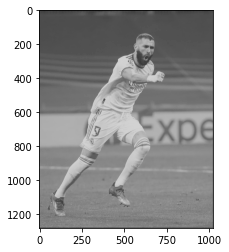

In [25]:
"""
Syntax dibawah merupakan syntax untuk menampilkan hasil konvolusi pada proses diatas
dengan memanfaatkan library matplotlib.pyplot (plt) menggunakan method imshow dari library tersebut
dan menggunakan cmap untuk dapat menampilkan gambar dalam abu-abu
"""
plt.imshow(konvResult, cmap='gray')

Konvolusi Dengan Clipping

In [26]:
"""
Syntax dibawah merupakan perulangan for yang digunakan untuk melakukan iterasi
dari 0 sampai ukuran panjang dan lebar dari citra guna melakukan perpindahan
proses perhitungan kernel sesuai teori dari konvolusi
"""
for i in range (tinggi):
    for j in range (lebar):
        
        """
        Syntax dibawah merupakan proses utama dari konvolusi pada citra yang ada,
        variabel konvResult digunakan untuk menyimpan data perhitungan konvolusi dari setiap
        perpindahan kernel pada matriks citra yang ada
        """
        konvResult[i][j] = imagePad[i][j]*kernelMatrix[0][0] + imagePad[i][j+1]*kernelMatrix[0][1] + imagePad[i][j+2]*kernelMatrix[0][2] + imagePad[i+1][j]*kernelMatrix[1][0] + imagePad[i+1][j+1]*kernelMatrix[1][1] + imagePad[i+1][j+2]*kernelMatrix[1][2] + imagePad[i+2][j]*kernelMatrix[2][0] + imagePad[i+2][j+1]*kernelMatrix[2][1] + imagePad[i+2][j+2]*kernelMatrix[2][2] + imagePad[i+3][j]*kernelMatrix[3][0] + imagePad[i+3][j+1]*kernelMatrix[3][1] + imagePad[i+3][j+2]*kernelMatrix[3][2]
        
        """
        Syntax dibawah merupakan proses dari clipping pada citra yang telah diolah sebelumnya,
        dimana clipping merupakan proses untuk mengubah jika:
        1. Nilai dari tingkat keabuan < 0 maka akan diubah menjadi 0
        2. NIlai dari tingkat keabuan > 255 maka akan diubah menjadi 255
        3. Nilai dari tingkat keabuan 0 < x < 255 maka dibiarkan
        """
        if (konvResult[i][j] < 0):
            konvResult[i][j] = 0
        elif (konvResult[i][j] > 255):
            konvResult[i][j] = 255

In [27]:
"""
Syntax dibawah merupakan syntax untuk menampilkan hasil dari konvolusi 
dengan clipping pada citra yang ada dengan menggunakan method print dari python
"""
print(konvResult)

[[ 77.  77.  77. ...  64.  96.   0.]
 [ 78.  78.  78. ...  64.  96.   0.]
 [ 75.  75.  75. ...  64.  96.   0.]
 ...
 [106. 110. 109. ... 128. 245.   0.]
 [226. 231. 227. ... 255. 255.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


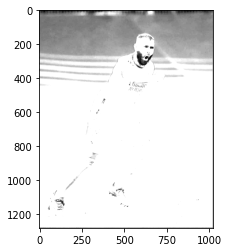

In [28]:
"""
Syntax dibawah merupakan syntax untuk menampilkan hasil konvolusi pada proses diatas
dengan memanfaatkan library matplotlib.pyplot (plt) menggunakan method imshow dari library tersebut
dan menggunakan cmap untuk dapat menampilkan gambar dalam abu-abu
"""
plt.imshow(konvResult, cmap='gray')